# Introduction to Tensorflow Regression

In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Creating Dataset

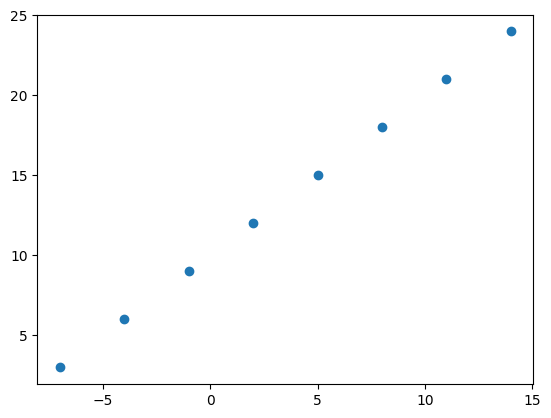

In [2]:
# Create features
X = np.arange(-7,15,3,dtype=np.float16)

# Create labels
y = np.arange(3,25,3,dtype=np.float16)

# Visualize
plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [4]:
# Input and Output Shapes
X.shape, y.shape

((8,), (8,))

In [5]:
# Shape of one input element
X[0].shape

# Shape of one output element
y[0].shape

# NOTE: The shape is () since we are dealing with tensors

()

In [6]:
# Scalars have dimension 0
X[0].ndim

0

In [7]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

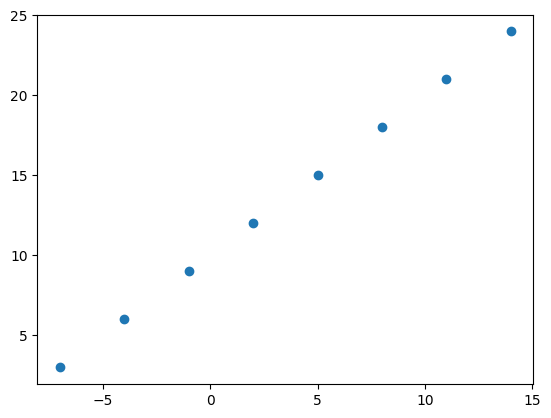

In [9]:
plt.scatter(X,y)

### Modelling with TF  - Experiment, Experiment, Experiment
1. Creating a model - define input and output layers, and the hidde layers of the NN
2. Compiling the model - Define the loss functions, optimizer and evaluation metrics
3. Fitting the model - Letting the model find the patterns between X & y (Features and labels)

Method 1:
- Add layers after creating a model from Sequential class

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with Sequential
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1, input_shape=(1,)))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 18.2598 - mae: 18.2598
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 17.9785 - mae: 17.9785
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 17.6973 - mae: 17.6973
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 17.4160 - mae: 17.4160
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 17.1348 - mae: 17.1348
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 16.8535 - mae: 16.8535
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 16.5723 - mae: 16.5723
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 16.2910 - mae: 16.2910
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 16.0098 - mae: 16.0098
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 15.7285 - mae: 15.7285


Method 2:
- Add the layers in the Sequential API while creating the model itself

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = (1,)) # It is 1, since we pass only 1 data pt
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 165ms/step - loss: 17.3107 - mae: 17.3107
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 17.0295 - mae: 17.0295
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 16.7482 - mae: 16.7482
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 16.4670 - mae: 16.4670
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 16.1857 - mae: 16.1857
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 15.9045 - mae: 15.9045
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 15.6232 - mae: 15.6232
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 15.3420 - mae: 15.3420
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 15.0607 - mae: 15.0607
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 14.8192 - mae: 14.8192


#### Predict using the trained Model

In [12]:
model_1.predict([17.0]), model_2.predict([17.0])

1/1 [==============================] - 0s 49ms/step


(array([[-8.84117]], dtype=float32), array([[-6.0630684]], dtype=float32))

### Improving the Model
- We can improve our model by modifying the steps we took to create a model

1. **Creating a model** 
    - Add more layers
    - Increase the number of neurons in the layers
    - Change the activation function in a each layer
2. **Compiling a model**
    - Change the optimizer
    - Change the loss function
    - Change the *learning rate* of optimizer
3. **Fitting a model**
    - Change the number of epochs
    - Provide more data to learn from

In [13]:
# Changes: Increase number of epochs

# 1. create the model
improv_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
improv_model1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
improv_model1.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 167ms/step - loss: 10.4918 - mae: 10.4918
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 10.3593 - mae: 10.3593
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2268 - mae: 10.2268
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0943 - mae: 10.0943
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9618 - mae: 9.9618
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.8293 - mae: 9.8293
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 9.6968 - mae: 9.6968
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.5643 - mae: 9.5643
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4318 - mae: 9.4318
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 9.2993 - mae: 9.2993
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - los

In [14]:
improv_model1.predict([17.0])

1/1 [==============================] - 0s 51ms/step


array([[29.70136]], dtype=float32)

##### `NOTE`: Common ways to better our DL model:
- Increase number of layers
- Increase anumber of neurons in each layer
- Change optimizer
- Change Learning Rate (The most hyperparam for most NN)
- Fitting on more data
- Fitting for more epochs

In [15]:
# Changes: improv1 + hidden layer with 50 layers + Cha

# 1. Create a model
improv_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
improv_model2.compile(loss = tf.losses.mae,
                        optimizer = tf.optimizers.Adam(0.01),
                        metrics = ["mae"])

# 3. Fit the model
improv_model2.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 225ms/step - loss: 13.4840 - mae: 13.4840
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7695 - mae: 12.7695
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.0565 - mae: 12.0565
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3392 - mae: 11.3392
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6147 - mae: 10.6147
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.8813 - mae: 9.8813
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1373 - mae: 9.1373
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3808 - mae: 8.3808
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.6093 - mae: 7.6093
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8202 - mae: 6.8202
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - l

In [16]:
improv_model2.predict([17.0])

# Though our loss is lesser than before, its prediction is worse. This is due to overfitting.
# Hence, our model has trained really well on training data, but on unseen data, its results are not good

1/1 [==============================] - 0s 55ms/step


array([[28.01403]], dtype=float32)

### Evaluating a Model - Visualize, Visualize, Visualize
* Visualize the data - What is the data you are working with? How does it look?
* Visualize the model - What does our model look like?
* Training of model - How does the model look while training?
* Predictions of model - How the predictions of the model compare to the ground truth?


In [17]:
# Make a larger dataset
X = tf.range(-100,100,4)
y = X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

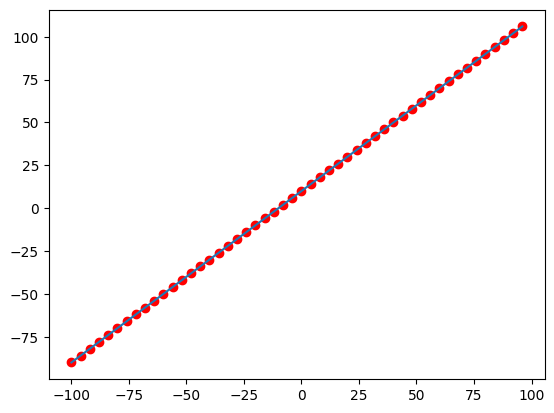

In [18]:
# Visualize the data
plt.plot(X,y)
plt.scatter(X,y,color='r')

#### The 3 datasets
> Training set
* Model learns on this data. 
* This is 70-80% of total data.
> Validation set
* Model gets tuned on this data. 
* This is 10-15% of total data.
> Test set
* Model gets evaluate on this data. 
* This is 10-15% of total data.

`We have these 3 sets to increase the model's ability to generalize`

In [19]:
len(X)

50

In [20]:
X_train = X[:40] # First 40 samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # remaining samples (20% of the data)
y_test = y[40:] 

len(X_train),len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#### Visualizing Data

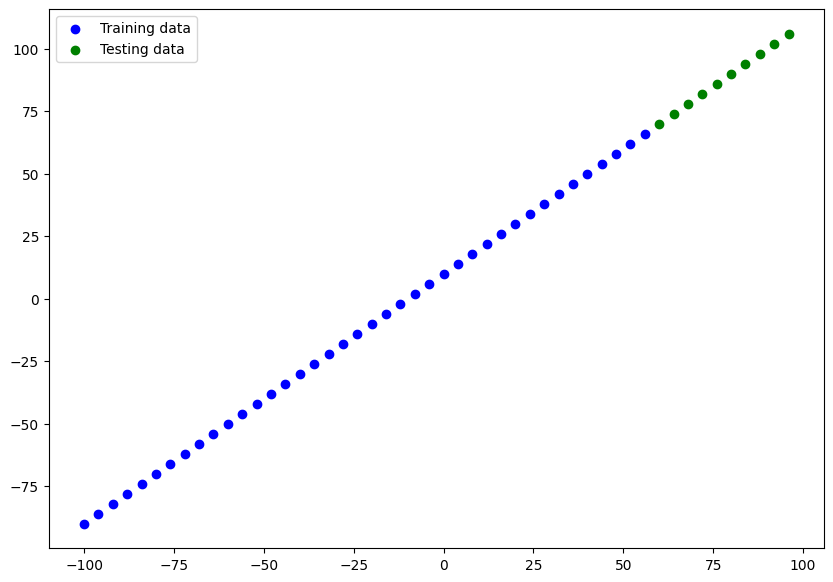

In [21]:
plt.figure(figsize=(10,7))

# Plot training data
plt.scatter(X_train, y_train, c='b', label = "Training data")

# Plot testing data
plt.scatter(X_test, y_test, c='g', label = "Testing data")

# Show legend
plt.legend()

#### Visualizing Model 
- Model Summary
- Plot_model


In [22]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. fit the model
# model.fit(X_train,y_train, epochs=100)


In [23]:
## ERROR OCCURS
# model.summary()
# NOTE: To get model summary without fitting, we need to 'build' the model or provide the input shape so it builds automatically

In [24]:
X[0].shape

TensorShape([])

In [45]:
# Let's create a model which builds automatically by defining the input_shape argument in first layer

tf.random.set_seed(42)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_Layer"),
    tf.keras.layers.Dense(1, name="Output_Layer")
], name="model_3")

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. fit the model
# model.fit(X_train,y_train, epochs=100)

# NOTE: To get model summary without fitting, we need to 'build' the model or provide the input shape so it builds automatically

In [46]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total parameters - Total number of parameters in the model.
* Trainable Parameters - The parameters that the model can update
* Non-trainable parameters - The parameters that aren't updated during training (This is typical when you bring in already learned patterns and parameters from other models during **transfer learning**)

**Resources:** [MIT's Introduction to Deep Learning](https://introtodeeplearning.com/2022/index.html)

In [47]:
model.fit(X_train,y_train,epochs=100,verbose=0)

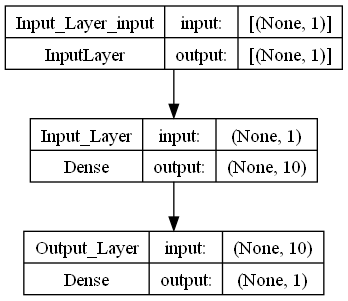

In [48]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualize Model's Predictions
- Plot the predictions (y_pred) against ground truth labels( y_train / y_test )



In [49]:
# Make predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 37ms/step


array([[ 70.383934],
       [ 74.96215 ],
       [ 79.54037 ],
       [ 84.1186  ],
       [ 88.696815],
       [ 93.27503 ],
       [ 97.85325 ],
       [102.431465],
       [107.00969 ],
       [111.58791 ]], dtype=float32)

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

Create a plotting functions

In [51]:
# Create a plotting function

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """ Plots training data, test data and compares the predictions to the ground truth"""

    plt.figure(figsize=(10,7))
    
    # Plot training data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    # Plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data,predictions,c='r',label="Predictions")
    # Show the legend
    plt.legend()

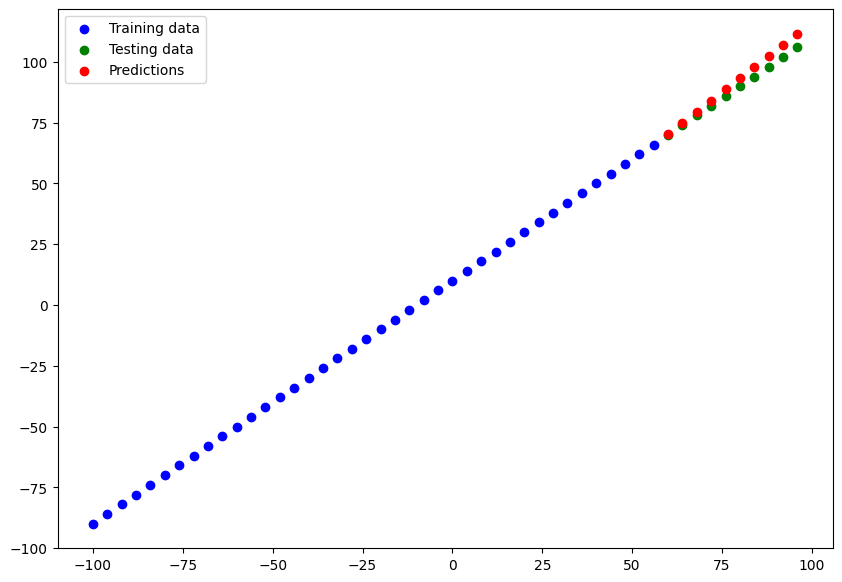

In [52]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluation Metrics for Regression Model

* MAE - Mean Absolute Error
    * Mean of absolute error
    * A starter metric for regression problems
    * Adv: It is most Robust to outliers.
    * Disadv: MAE is not differential, hence can't apply optimizers like Gradient Descent
###
* MSE - Mean Squared Error
    * Mean of squares of absolute error
    * When larger errors are more significant than smaller errors
    * Adv: MSE is differential
    * Disadv: MSE is not Robust to outliers (Outliers are penalised the most, since the deviation itself is high and we are squaring it too)
###
* Huber - Combination of MSE and MAE
    * Less sensitive to outliers than MSE
###
* RMSE - Root Mean Squared Error
    * Root of mean of squares of absolute errors
    * Adv: RMSE is differential and unit is same as output variable
    * Disadv: RMSE is not as Robust as MAE, to outliers.

In [53]:
model.evaluate(X_test,y_test)

# Metrics is MAE since metrics and loss in compiling is MAE

1/1 [==============================] - 0s 83ms/step - loss: 2.9859 - mae: 2.9859


[2.9859213829040527, 2.9859213829040527]

In [54]:
y_test,tf.squeeze(y_pred)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.383934,  74.96215 ,  79.54037 ,  84.1186  ,  88.696815,
         93.27503 ,  97.85325 , 102.431465, 107.00969 , 111.58791 ],
       dtype=float32)>)

In [55]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.9859214>

In [56]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.674015>

In [57]:
# Make a function to reuse MAE and MSE

def MAE(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

def MSE(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))


### Experiments to Improve Models

```
Build model -> fit -> evaluate -> tweak -> fit -> evaluate -> tweak
```
1. Get more data for model to train on, to learn patterns and relationships between features and labels

2. Build larger models (Complex models)
    * More layers and hidden units in each layer
##
3. Train for more epochs


Build 3 models:
- Model_1 -> 1 layer and 100 epochs
- Model_2 -> 2 layers and 100 epochs
- Model_3 -> 2 layers and 500 epochs

In [58]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [71]:
# Model_1  -  1 layer and 100 epochs

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model1.fit(X_train,y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 53.3777 - mae: 53.3777
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 19.6346 - mae: 19.6346
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2559 - mae: 11.2559
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5965 - mae: 9.5965
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.5081 - mae: 10.5081
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.7316 - mae: 9.7316
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.8239 - mae: 8.8239
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0768 - mae: 9.0768
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.3643 - mae: 19.3643
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.4634 - mae: 10.4634
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 35ms/step


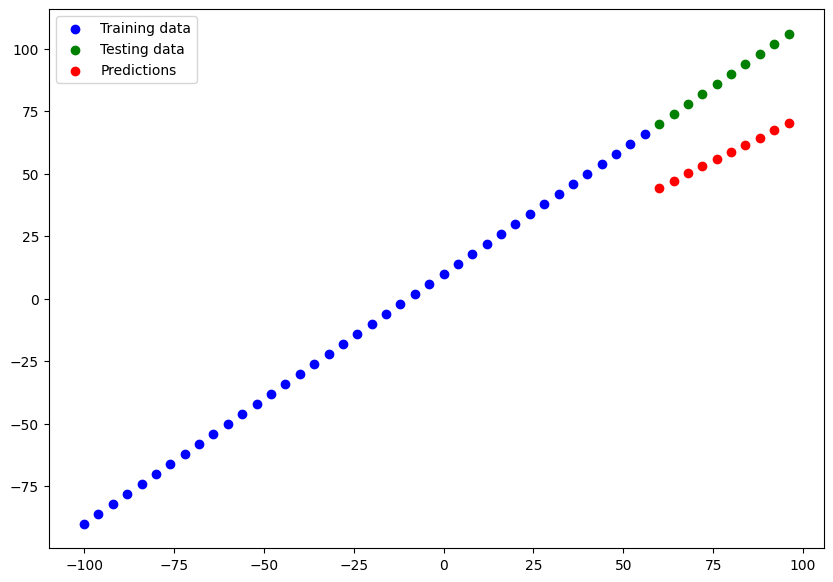

In [72]:
# Make and plot predictions for model1
y_pred1 = model1.predict(X_test)
plot_predictions(predictions=y_pred1)

In [73]:
# Calculate model1 evaluation metrics

mae1 = MAE(y_true=y_test, y_pred=y_pred1)
mse1 = MSE(y_true=y_test, y_pred=y_pred1)
mae1,mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.674597>,
 <tf.Tensor: shape=(), dtype=float32, numpy=951.4004>)

In [74]:
# Model2 - 2 layer and 100 epochs

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model2.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 36.7745 - mse: 1976.8217
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 29.7012 - mse: 1165.2068
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 33.0303 - mse: 1670.0690
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 17.5512 - mse: 433.2603
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 23.5778 - mse: 820.5426
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.9567 - mse: 133.3079
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 12.0126 - mse: 181.1525
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 13.0966 - mse: 237.8725
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 34.6924 - mse: 1814.2777
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 24.0690 - mse: 810.9003
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 39ms/step


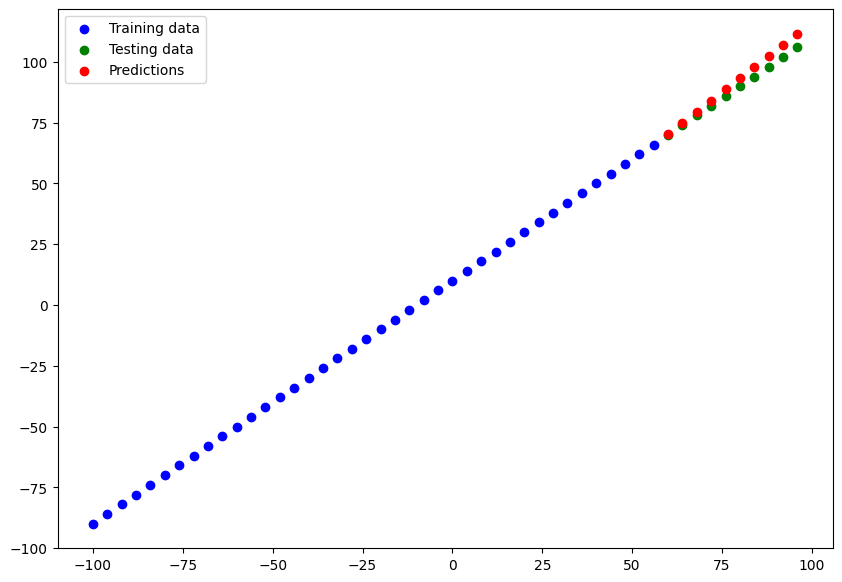

In [75]:
# Make and plot predictions for model2
y_pred2 = model2.predict(X_test)
plot_predictions(predictions=y_pred2)

In [76]:
# Calculate model2 evaluation metrics
mae2 = MAE(y_true=y_test, y_pred=y_pred2)
mse2 = MSE(y_true=y_test, y_pred=y_pred2)
mae2,mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.992288>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.7176075>)

In [77]:
# Model3 - 2 layers and 500 epochs
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

model3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 64.6669 - mse: 6238.8442
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 43.5354 - mse: 2812.5017
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 36.3352 - mse: 2005.9789
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 17.8549 - mse: 493.3866
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 22.6903 - mse: 761.7213
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 13.1554 - mse: 239.6394
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 12.4309 - mse: 200.1911
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 14.2342 - mse: 288.8228
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 32.8919 - mse: 1595.2261
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 22.3572 - mse: 697.4058
Epoch 11/500
2/2 [===========================

1/1 [==============================] - 0s 40ms/step


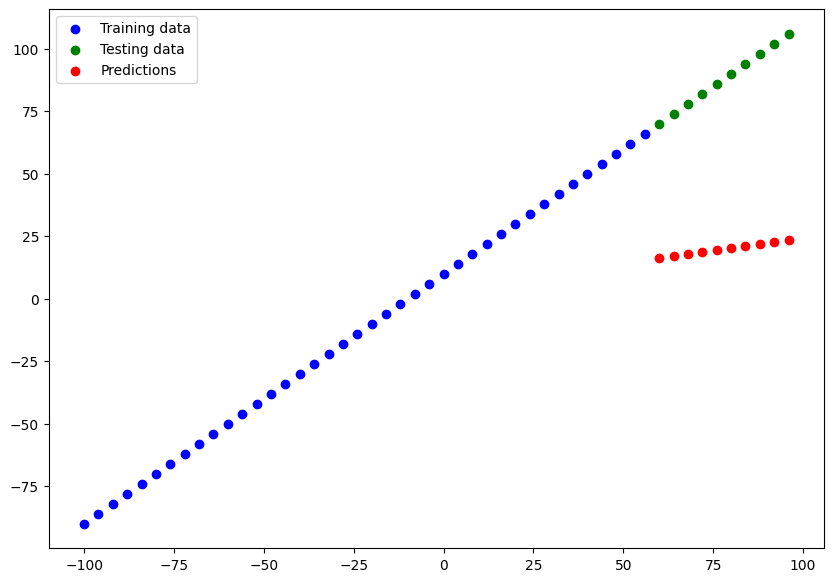

In [78]:
# Make and plot predictions for model2
y_pred3 = model3.predict(X_test)
plot_predictions(predictions=y_pred3)

In [79]:
# Create Evaluation metrics

mae3 = MAE(y_test, y_pred3)
mse3 = MSE(y_test, y_pred3)
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.91172>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4696.5986>)

**NOTE:** Start with small experiments and make sure they work and then increase their scale when necessary.

### Comparing the results of our Experiments

In [94]:
# Let's compare our model results with pandas dataframe

model_results = [["model1", mae1.numpy(), mse1.numpy()],
                ["model2", mae2.numpy(), mse2.numpy()],
                ["model3", mae3.numpy(), mse3.numpy()]]

results = pandas.DataFrame(model_results, columns=["Model","MAE","MSE"])
results

,Model,MAE,MSE
0,model1,30.674597,951.400391
1,model2,2.992288,11.717607
2,model3,67.911720,4696.598633


In [95]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


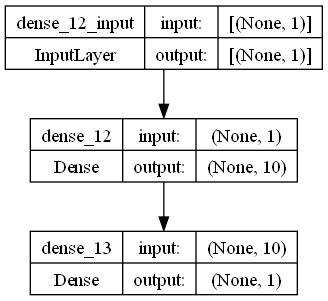

In [96]:
plot_model(model2, show_shapes=True)